# Item Analyses To Improve Test Bank Quality

Examines student responses to individual test items to assess the quality of those items 

Valuable in improving items which will be used again in later tests

The quality of individual items is assessed by comparing students’ item responses to their total test scores.

## Item Statistics
<p> Item statistics are used to assess the performance of individual test items on the assumption that the overall quality of a test derives from the quality of its items. </p> 

### Item Difficulty

Item difficulty is simply the percentage of students who answer an item correctly. In this case, it is also equal to the item mean. 
The item difficulty index ranges from 0 to 100; the higher the value, the easier the question. Item difficulty plays an important role in the ability of an item to discriminate between students who know the tested material and those who do not. The item will have low discrimination if it is so difficult that almost everyone gets it wrong or guesses, or so easy that almost everyone gets it right. We can arbitrarily clasify item difficulty as:

* “easy” if the index is 90% or above
* “moderate” if it is between 21 and 90%
* and “hard” if it is 20% or below.

### Item Discrimination

Item discrimination refers to the ability of an item to differentiate among students on the basis of how well they know the material being tested. 

The item discrimination index is normally a Pearson Product Moment correlation between student responses to a particular item and total scores on all other items on the test. This index is the equivalent of a point-biserial coefficient. It provides an estimate of the degree to which an individual item is measuring the same thing as the rest of the items.

Tests with high internal consistency consist of items with mostly positive relationships with total test score. We can classify item discrimination as: 
* “good” if the index is above .30
* “fair” if it is between .10 and.30
* and “poor” if it is below .10.

## Import required libraries and data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [42]:
itemData = pd.read_csv('itemData.csv')
print(itemData.shape)
itemData.head()

(2000, 26)


,ID,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25
0,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,0
1,2,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2,3,1,0,0,1,1,1,0,0,1,...,1,0,0,1,1,0,1,1,1,0
3,4,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,0,0,1
4,5,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,0


## Classical item analysis function

In [43]:
def CIA(CIAdat):
        
    CIAdat['AVGSCORE'] = CIAdat.iloc[:,1:CIAdat.shape[1]].mean(axis=1)
    CIAdat['CountItemsAnswered']= CIAdat.iloc[:,1:CIAdat.shape[1]].count(axis=1)
    AVGSCORE = CIAdat[['ID','AVGSCORE']]
    CIAdat = CIAdat[(CIAdat.CountItemsAnswered > 3)] # Take only students who answered more than 3 items
    CIAdat = CIAdat.sort('AVGSCORE',ascending = False)
    CIAdat = CIAdat.drop(['AVGSCORE','CountItemsAnswered'],1)
    
    tablelist = []
    for item in CIAdat:
        if item != 'ID':
            
            count_overall = CIAdat[item].count()
            a = pd.concat([CIAdat['ID'],CIAdat[item]],1)
            b = a.merge(AVGSCORE, on = 'ID')
            notnan_overall = a[~a[item].isnull()]

            # remove items that are answered less than 10 times
            if len(notnan_overall) < 10:
                averageScore = np.nan
                medianScore = np.nan
                difficulty = np.nan
                discrimination = np.nan
                bisCorrpearson = np.nan
            else:
                medianScore = float(CIAdat[item].median())
                Difficulty = float((CIAdat[item].mean()))
                discrimination = b[item].corr(b['AVGSCORE'], method='spearman')
                
            tablerow = [item,count_overall,Difficulty,discrimination]
            tablelist.append(tablerow)

    CIAStats = pd.DataFrame(tablelist)
    CIAStats.columns = ['QUESTIONID','Students Answered Count','Difficulty','Discrimination']
    CIAStats.QUESTIONID.astype(str)    
    
    return CIAStats

## Summary table of item statistics

In [44]:
CIAStats = CIA(itemData)
CIAStats

,QUESTIONID,Students Answered Count,Difficulty,Discrimination
0,item1,2000,0.3740,0.357040
1,item2,2000,0.9325,0.102568
2,item3,2000,0.3105,0.284215
3,item4,2000,0.9945,0.046244
4,item5,2000,0.9910,0.073271
5,item6,2000,0.6745,0.396978
6,item7,2000,0.4245,0.442480
7,item8,2000,0.0005,0.010806
8,item9,2000,0.0030,0.065762
9,item10,2000,0.4640,0.425436


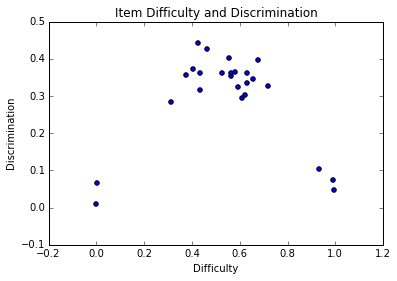

In [46]:
plt.scatter(CIAStats.Difficulty,CIAStats.Discrimination)
plt.xlabel('Difficulty')
plt.ylabel('Discrimination')
plt.title('Item Difficulty and Discrimination')
plt.show()

## How to use item statistics to improve item bank quality

#### Questions
1. Which item(s) could you remove altogether from the exam? Why?
2. Which items are working well?

#### Which item(s) could you remove altogether from the exam? Why?
By exploring item difficulty, 
* items 2, 4, and 5 appear extremely easy (Difficulty >.90)
* items 8 and 9 appear extremely difficult (Difficulty <. 20)
By exploring item discrimination, 
* items 4, 8, 9, and possibly 5 appear to indicate poor discriminating items (discrimination values near or less than 0.1). 

This indicates that students who overall did poorly on the exam did better on these questions than students who overall did well.

Therefore, by combining the results from these two investigations, items 4, 5, 8, and 9 appear to be the best items to delete from this exam. It is good practice to review deleting item process before deleting items from exam.

#### Which items are working well?
Items that appear to be working well (i.e. good difficulty, and discrimination) are items, 1, 2, 3, and possibly 7 and 10 depending upon the purpose of the exam.

# Item Response Theory (IRT)
<img src='IRTmethods.png' width="500" height="500" >

# Classical Test Theory vs. Latent Trait Models

* Classical analysis has the test (not the item) as its basis. Although the statistics generated are often generalised to similar students taking a similar test; they only really apply to those students taking that test
* Latent trait models aim to look beyond that at the underlying traits which are producing the test performance.  They are measured at item level and provide sample-free measurement

## Why IRT is a latent trait models
What are exams trying to measure:

* The Students’ Ability

Features of Ability:
* something that is abstract
* something that cannot be directly measured
* something that is latent